In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
orders = pd.read_csv('orders.csv',sep=";")
orders.head()

,id,revenue
0,1,2439
1,2,1083
2,3,1326
3,4,3309
4,5,5876


In [3]:
    boot_it = 2000
    boot_data = []
    boot_conf_level = 0.95
    for i in range(boot_it):
        samples = orders['revenue'].sample(len(orders['revenue']), replace = True)
        boot_data.append(np.median(samples))

    print(f'Original: {np.mean(orders["revenue"])}, Boot: {np.mean(boot_data)}')

Original: 4621.02, Boot: 3301.804


In [4]:
# Найдем доверительный интервал
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci = pd.Series(boot_data).quantile([left_ci, right_ci])

print(ci)

0.025    2521.5
0.975    4469.0
dtype: float64


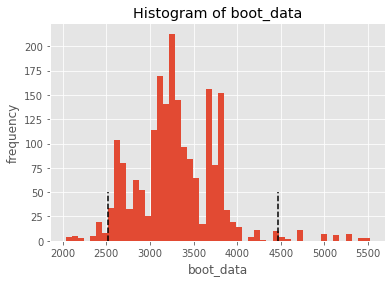

In [5]:
plt.hist(pd.Series(boot_data), bins = 50)
plt.style.use('ggplot')
plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()